In [2]:
from samalg import SAM
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context

SyntaxError: invalid syntax (<ipython-input-2-6082ed694c85>, line 4)

In [8]:
print(sc.__version__)

1.8.2


In [2]:
samsporo=SAM()

In [3]:
samsporo.load_data('sporocysts3.stem.counts_2.csv')

In [4]:
samsporo.preprocess_data()

In [5]:
samsporo.run(seed=20)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7902987092350804
Iteration: 2, Convergence: 0.023399735066313813
Computing the UMAP embedding...
Elapsed time: 5.7068870067596436 seconds


<AxesSubplot:>

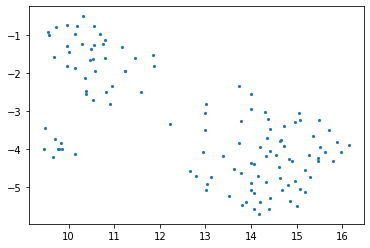

In [6]:
samsporo.scatter()

In [7]:
samsporo.dispersion_ranking_NN(save_avgs=True)

array([0.        , 0.        , 0.        , ..., 0.88981988, 0.52838208,
       0.7645822 ])

In [8]:
samsporo.clustering(method = 'leiden', param = 0.8)

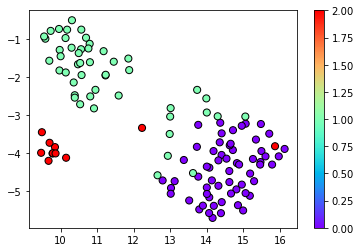

In [9]:
samsporo.scatter(c = 'leiden_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('samsporo3.stem.seed20.leiden_clusters2.pdf', dpi=500)

In [9]:
samsporo.clustering(method = 'kmeans')

(array([0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 5, 5, 5, 5, 1, 1, 1, 4, 5, 1, 2,
        1, 0, 2, 5, 5, 2, 1, 0, 5, 1, 5, 1, 4, 0, 3, 3, 3, 1, 5, 0, 0, 1,
        3, 4, 5, 3, 1, 4, 3, 5, 1, 1, 1, 0, 1, 3, 5, 5, 1, 2, 5, 1, 0, 4,
        0, 1, 0, 0, 1, 5, 2, 1, 1, 2, 5, 5, 0, 1, 5, 0, 0, 2, 5, 1, 5, 0,
        0, 0, 4, 0, 4, 1, 1, 5, 0, 3, 1, 5, 0, 1, 5, 5, 0, 0, 1, 5, 3, 0,
        5, 0, 4, 0, 5, 4, 5, 1, 1], dtype=int32),
 KMeans(n_clusters=6))

In [11]:
samsporo.clustering(method = 'kmeans', param=3)

(array([2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2,
        1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1,
        2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2,
        2, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,
        0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2,
        0, 2, 2, 2, 0, 2, 0, 1, 1], dtype=int32),
 KMeans(n_clusters=3))

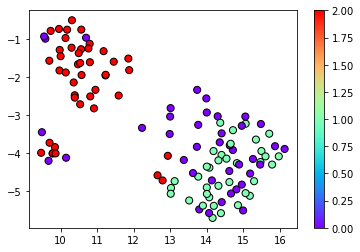

In [12]:
samsporo.scatter(c = 'kmeans_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('samsporo3.stem.seed20.kmeans_clusters3.pdf', dpi=500)

In [13]:
print(samsporo.adata.uns['ranked_genes'][:20])

['Smp-319650' 'Smp-201060' 'Smp-006390' 'Smp-033050' 'Smp-302860'
 'Smp-312630' 'Smp-200180' 'Smp-341080' 'Smp-101970' 'Smp-042140'
 'Smp-309860' 'Smp-175660' 'Smp-025560' 'Smp-008660' 'Smp-032240'
 'Smp-170570' 'Smp-146800' 'Smp-091480' 'Smp-105680' 'Smp-072970']


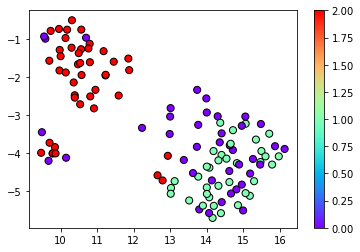

In [14]:
samsporo.scatter(c = 'kmeans_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('samsporo3.stem.seed20.kmeans3_clusters.pdf', dpi=500)

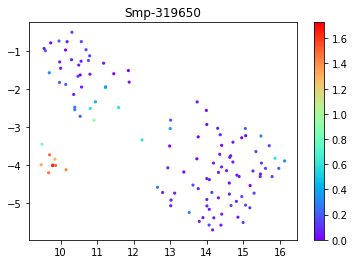

In [15]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][0]);
plt.savefig('samsporo3.stem.seed20.top0.pdf', dpi=500)

In [16]:
samsporo.adata

AnnData object with n_obs × n_vars = 119 × 9842
    obs: 'leiden_clusters', 'kmeans_clusters'
    var: 'mask_genes', 'means', 'variances', 'weights', 'spatial_dispersions'
    uns: 'path_to_file', 'preprocess_args', 'run_args', 'ranked_genes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_disp', 'X_knn_avg'
    obsp: 'distances', 'connectivities', 'nnm'

In [17]:
sc.pl.violin(samsporoadata, ['Smp-172480', 'Smp-051920', 'Smp-179320'],size = 3, groupby='leiden_clusters', save='sporo_stem.seed20.kappa.pdf' )

NameError: name 'samsporoadata' is not defined

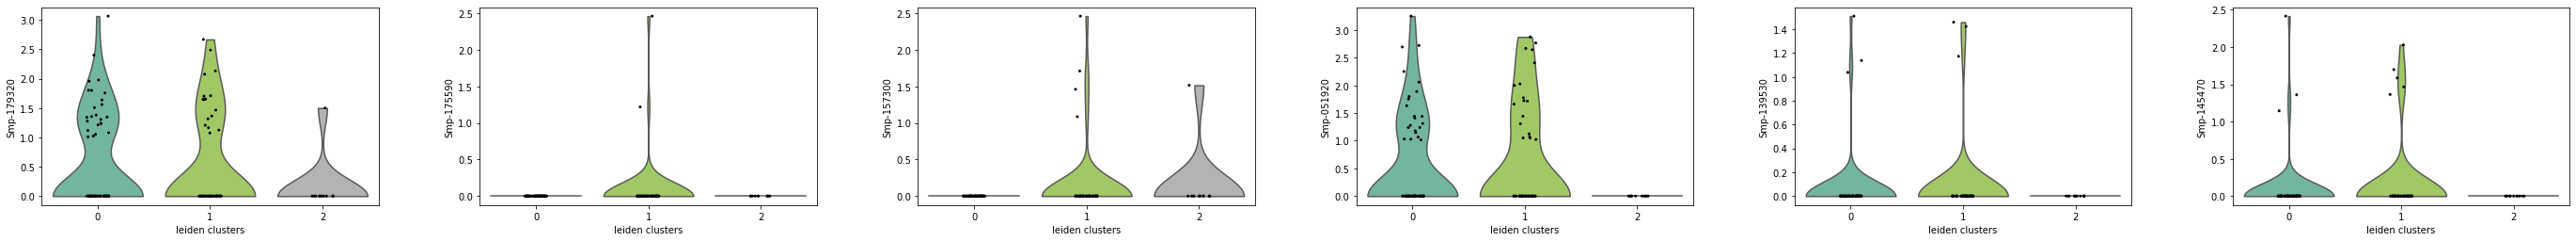

In [53]:
sc.pl.violin(samsporoadata, ['Smp-179320', 'Smp-175590', 'Smp-157300', 'Smp-051920', 'Smp-139530', 'Smp-145470'], size = 3, groupby='leiden_clusters', save='sporo_stem.seed20.delta.pdf')

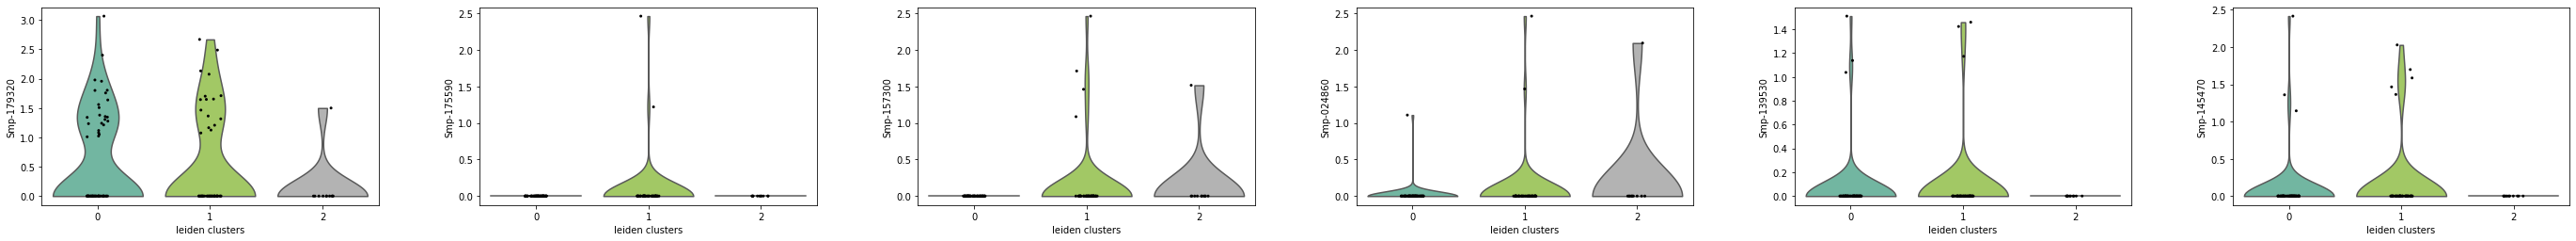

In [54]:
sc.pl.violin(samsporoadata, ['Smp-179320', 'Smp-175590', 'Smp-157300', 'Smp-024860', 'Smp-139530', 'Smp-145470'], size = 3, groupby='leiden_clusters',  save='sporo_stem.seed20.phi.pdf')

In [10]:
sc.pl.umap(samsporoadata, color='leiden_clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='Leiden clustering of cells', palette='Set2')

NameError: name 'samsporoadata' is not defined

In [60]:
marker_genes_dict = {
    '0': ['Smp-040100', 'Smp-054240', 'Smp-309860'],
    '1': ['Smp-347660', 'Smp-078090', 'Smp-035430'],
    '2': ['Smp-024030', 'Smp-054200', 'Smp-054560'],
    '3': ['Smp-312630', 'Smp-042140', 'Smp-302860'],

}

In [58]:
marker_genes_dict = {
    '0': ['Smp-319650', 'Smp-201060', 'Smp-006390', 'Smp-033050', 'Smp-302860',
 'Smp-312630', 'Smp-200180', 'Smp-341080', 'Smp-101970', 'Smp-042140',
 'Smp-309860', 'Smp-175660', 'Smp-025560', 'Smp-008660', 'Smp-032240',
 'Smp-170570', 'Smp-146800', 'Smp-091480', 'Smp-105680', 'Smp-072970'],
    '1': ['Smp-319650', 'Smp-201060', 'Smp-006390', 'Smp-033050', 'Smp-302860',
 'Smp-312630', 'Smp-200180', 'Smp-341080', 'Smp-101970', 'Smp-042140',
 'Smp-309860', 'Smp-175660', 'Smp-025560', 'Smp-008660', 'Smp-032240',
 'Smp-170570', 'Smp-146800', 'Smp-091480', 'Smp-105680', 'Smp-072970'],
    '2': ['Smp-319650', 'Smp-201060', 'Smp-006390', 'Smp-033050', 'Smp-302860',
 'Smp-312630', 'Smp-200180', 'Smp-341080', 'Smp-101970', 'Smp-042140',
 'Smp-309860', 'Smp-175660', 'Smp-025560', 'Smp-008660', 'Smp-032240',
 'Smp-170570', 'Smp-146800', 'Smp-091480', 'Smp-105680', 'Smp-072970'],
    '3': ['Smp-319650', 'Smp-201060', 'Smp-006390', 'Smp-033050', 'Smp-302860',
 'Smp-312630', 'Smp-200180', 'Smp-341080', 'Smp-101970', 'Smp-042140',
 'Smp-309860', 'Smp-175660', 'Smp-025560', 'Smp-008660', 'Smp-032240',
 'Smp-170570', 'Smp-146800', 'Smp-091480', 'Smp-105680', 'Smp-072970'],

}

In [66]:
sc.tl.dendrogram(samsporoadata, groupby='leiden_clusters')

In [70]:
sc.pl.dendrogram(samsporoadata)

TypeError: dendrogram() missing 1 required positional argument: 'groupby'

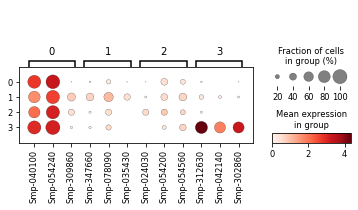

In [72]:
sc.pl.dotplot(samsporoadata, marker_genes_dict,'leiden_clusters', dendrogram=False)

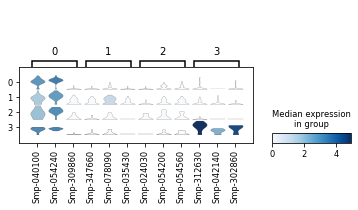

In [74]:
sc.pl.stacked_violin(samsporoadata, marker_genes_dict, groupby='leiden_clusters', swap_axes=False, dendrogram=False)

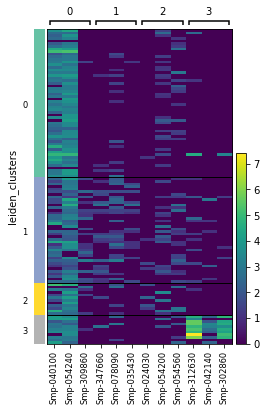

In [76]:
sc.pl.heatmap(samsporoadata, marker_genes_dict, groupby='leiden_clusters', cmap='viridis', dendrogram=False)

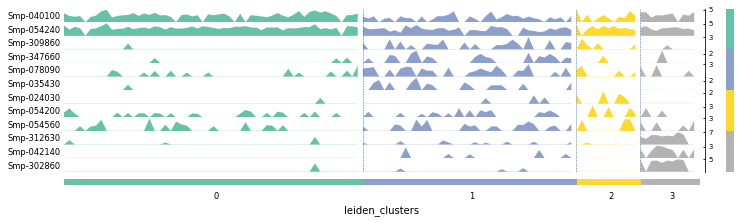

In [77]:
sc.pl.tracksplot(samsporoadata, marker_genes_dict, groupby='leiden_clusters', dendrogram=False)

In [78]:
sc.tl.rank_genes_groups(samsporoadata, groupby='leiden_clusters', method='wilcoxon')

In [84]:
pd.DataFrame(samsporoadata.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3
0,Smp-129410,Smp-006780,Smp-091240,Smp-312630
1,Smp-050280,Smp-309860,Smp-336250,Smp-319650
2,Smp-213130,Smp-347660,Smp-046680,Smp-302860
3,Smp-347110,Smp-035430,Smp-061200,Smp-153490
4,Smp-047200,Smp-093690,Smp-076660,Smp-025860


In [85]:
top_genes_dict = {
    '0': ['Smp-129410', 'Smp-050280', 'Smp-213130', 'Smp-347110', 'Smp-047200'],
    '1': ['Smp-006780', 'Smp-309860', 'Smp-347660', 'Smp-035430', 'Smp-093690'],
    '2': ['Smp-091240', 'Smp-336250', 'Smp-046680', 'Smp-061200', 'Smp-076660'],
    '3': ['Smp-312630', 'Smp-319650', 'Smp-302860', 'Smp-153490', 'Smp-025860'],
    

}

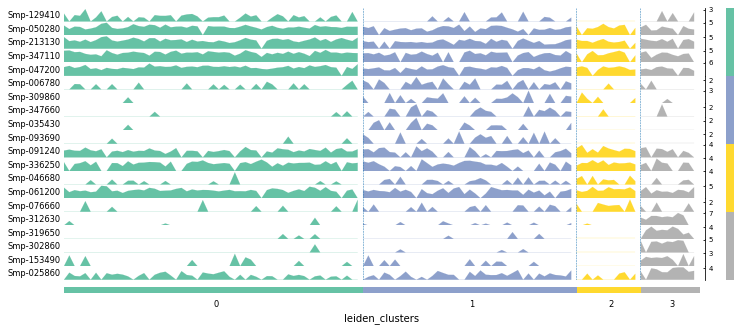

In [86]:
sc.pl.tracksplot(samsporoadata, top_genes_dict, groupby='leiden_clusters', dendrogram=False)

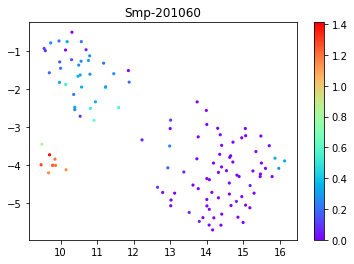

In [15]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][1]);
plt.savefig('samsporo3.stem.seed20.top1.pdf', dpi=500)

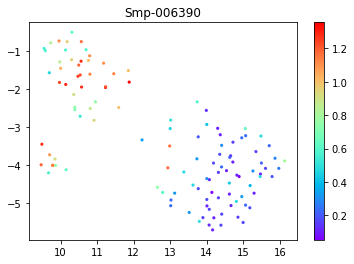

In [16]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][2]);
plt.savefig('samsporo3.stem.seed20.top2.pdf', dpi=500)

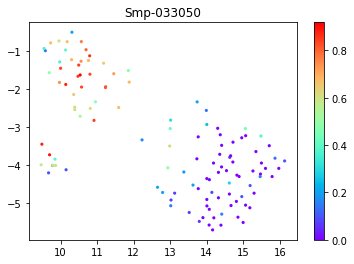

In [17]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][3]);
plt.savefig('samsporo3.stem.seed20.top3.pdf', dpi=500)

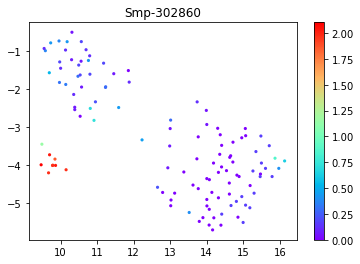

In [18]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][4]);
plt.savefig('samsporo3.stem.seed20.top4.pdf', dpi=500)

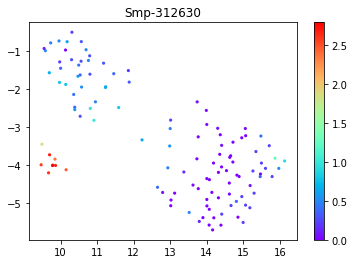

In [19]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][5]);
plt.savefig('samsporo3.stem.seed20.top5.pdf', dpi=500)

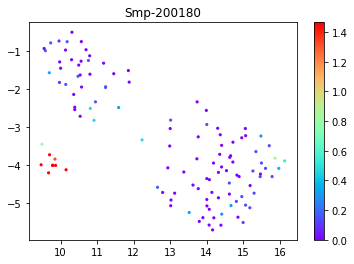

In [20]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][6]);
plt.savefig('samsporo3.stem.seed20.top6.pdf', dpi=500)

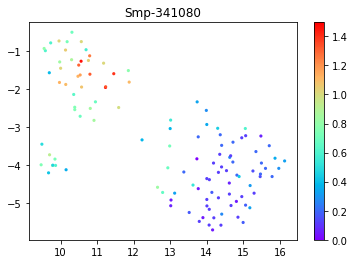

In [21]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][7]);
plt.savefig('samsporo3.stem.seed20.top7.pdf', dpi=500)

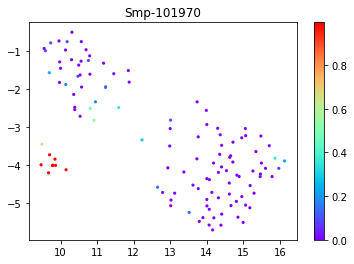

In [22]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][8]);
plt.savefig('samsporo3.stem.seed20.top8.pdf', dpi=500)

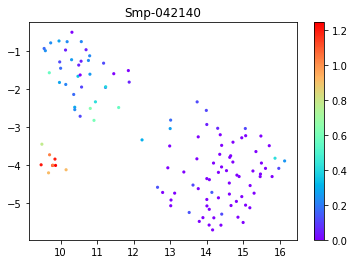

In [23]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][9]);
plt.savefig('samsporo3.stem.seed20.top9.pdf', dpi=500)

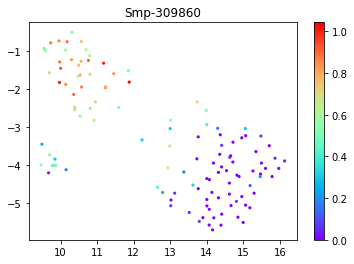

In [24]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][10]);
plt.savefig('samsporo3.stem.seed20.top10.pdf', dpi=500)

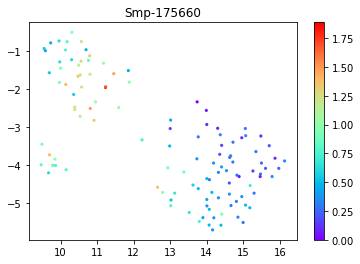

In [25]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][11]);
plt.savefig('samsporo3.stem.seed20.top11.pdf', dpi=500)

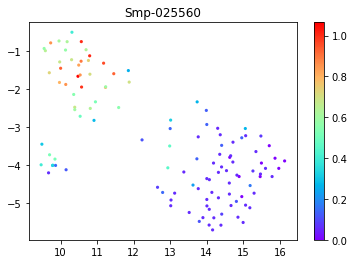

In [26]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][12]);
plt.savefig('samsporo3.stem.seed20.top12.pdf', dpi=500)

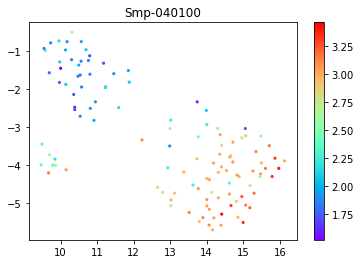

In [61]:
samsporo.show_gene_expression('Smp-040100');
plt.savefig('samsporo3.stem.seed20.Smp-040100.pdf', dpi=500)

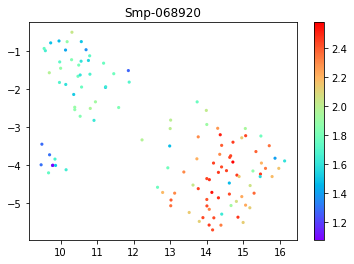

In [63]:
samsporo.show_gene_expression('Smp-068920');
plt.savefig('samsporo3.stem.seed20.Smp-068920.pdf', dpi=500)

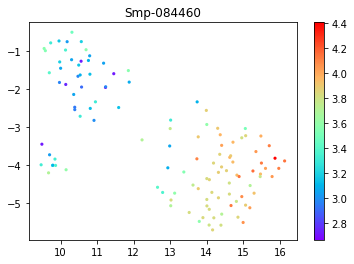

In [64]:
samsporo.show_gene_expression('Smp-084460');
plt.savefig('samsporo3.stem.seed20.Smp-084460.pdf', dpi=500)

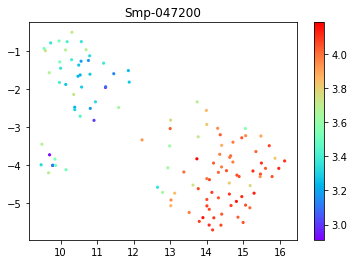

In [65]:
samsporo.show_gene_expression('Smp-047200');
plt.savefig('samsporo3.stem.seed20.Smp-047200.pdf', dpi=500)

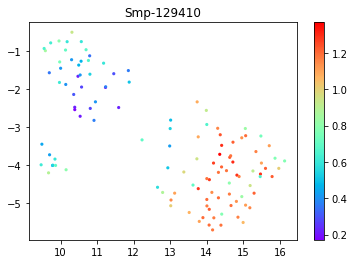

In [66]:
samsporo.show_gene_expression('Smp-129410');
plt.savefig('samsporo3.stem.seed20.Smp-129410.pdf', dpi=500)

In [43]:
markers_clust0, marker_scores_clust0 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [0])

In [44]:
first_value = list(markers_clust0.values())[0]
first_value
first_value[:10]

array(['Smp-040100', 'Smp-054240', 'Smp-309860', 'Smp-068920',
       'Smp-347660', 'Smp-078090', 'Smp-347060', 'Smp-084460',
       'Smp-047200', 'Smp-129410'], dtype='<U12')

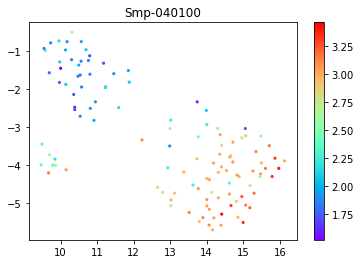

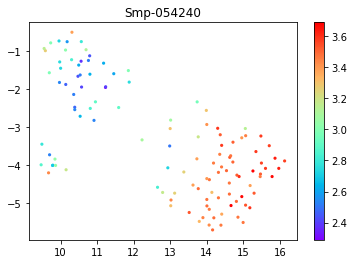

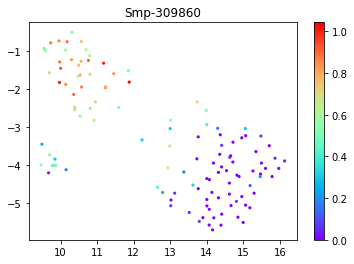

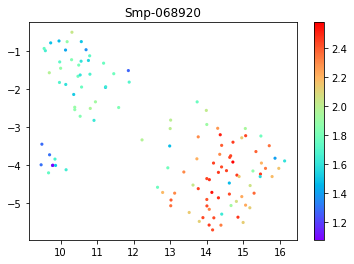

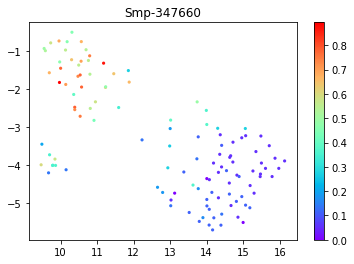

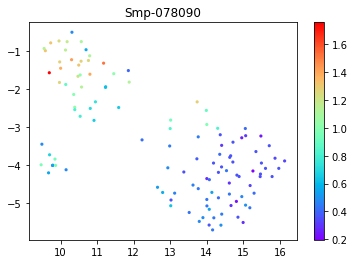

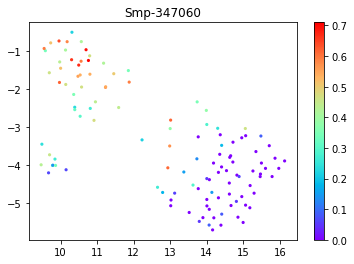

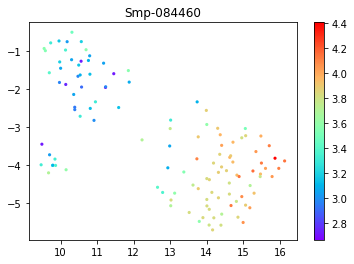

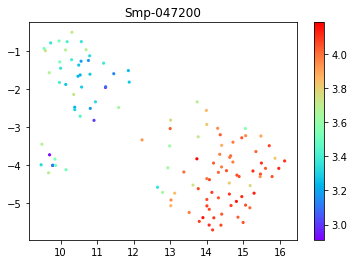

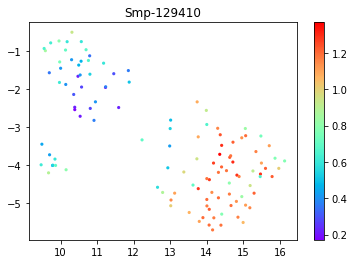

In [29]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

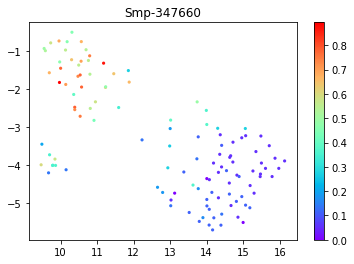

In [67]:
samsporo.show_gene_expression('Smp-347660');
plt.savefig('samsporo3.stem.seed20.Smp-347660.pdf', dpi=500)

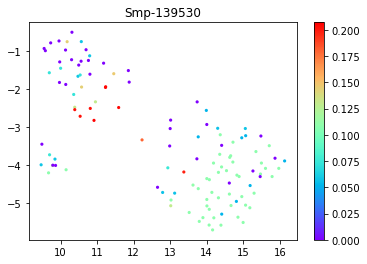

In [18]:
samsporo.show_gene_expression('Smp-139530');
plt.savefig('samsporo3.stem.seed20.Smp-139530.pdf', dpi=500)

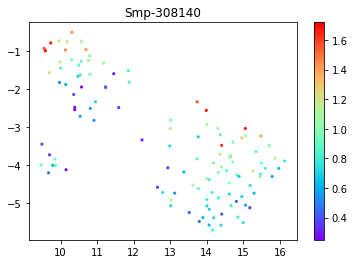

In [19]:
samsporo.show_gene_expression('Smp-308140');
plt.savefig('samsporo3.stem.seed20.Smp-308140.pdf', dpi=500)

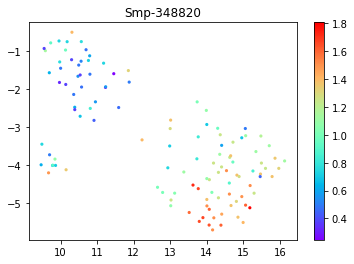

In [20]:
samsporo.show_gene_expression('Smp-348820');
plt.savefig('samsporo3.stem.seed20.Smp-348820.pdf', dpi=500)

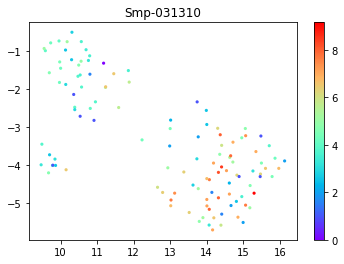

In [21]:
samsporo.show_gene_expression('Smp-031310');
plt.savefig('samsporo3.stem.seed20.Smp-031310.pdf', dpi=500)

In [45]:
markers_clust1, marker_scores_clust1 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [1])

In [46]:
first_value = list(markers_clust1.values())[0]
first_value
first_value[:10]

array(['Smp-347660', 'Smp-078090', 'Smp-035430', 'Smp-089430',
       'Smp-093310', 'Smp-084460', 'Smp-093690', 'Smp-335300',
       'Smp-040100', 'Smp-105320'], dtype='<U12')

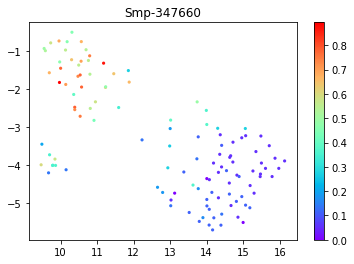

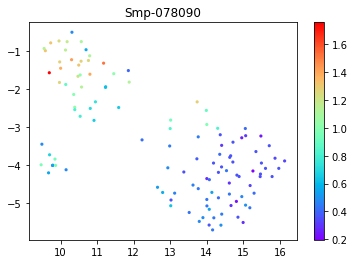

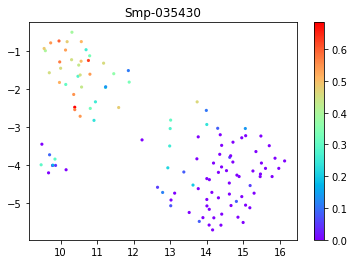

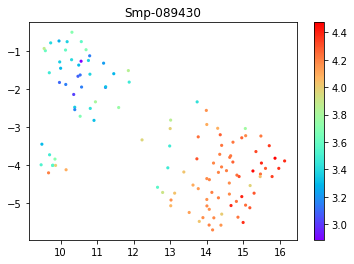

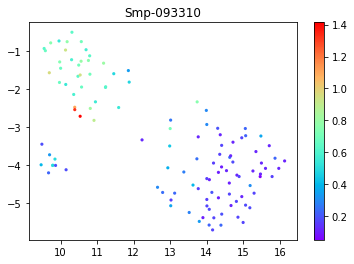

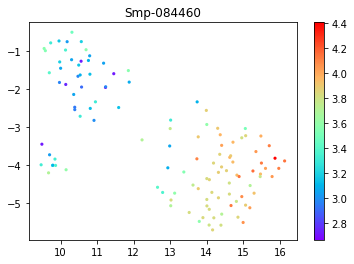

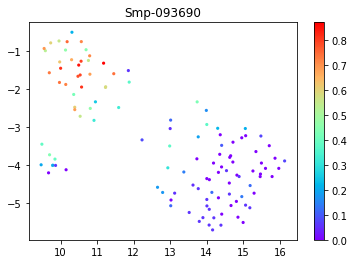

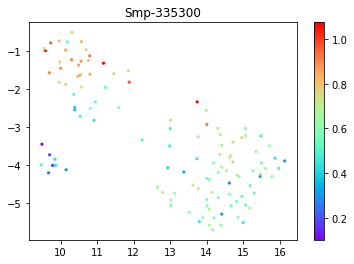

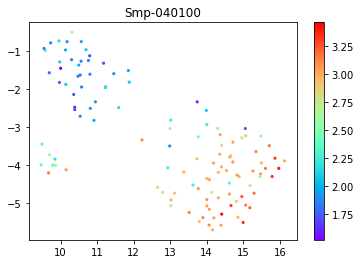

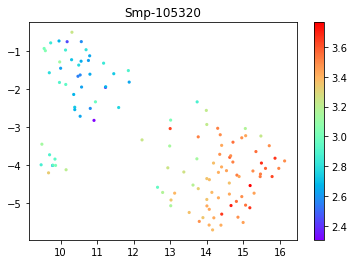

In [32]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [47]:
markers_clust2, marker_scores_clust2 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [2])

In [48]:
first_value = list(markers_clust2.values())[0]
first_value
first_value[:10]

array(['Smp-024030', 'Smp-054200', 'Smp-054560', 'Smp-147960',
       'Smp-074260', 'Smp-103280', 'Smp-308600', 'Smp-136770',
       'Smp-004680', 'Smp-064360'], dtype='<U12')

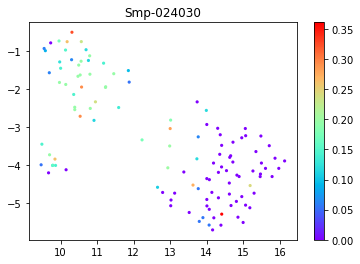

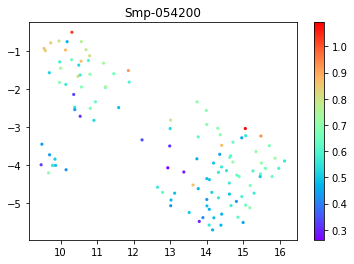

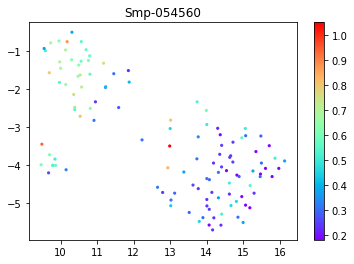

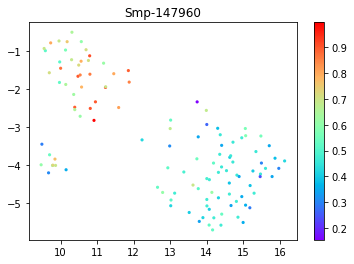

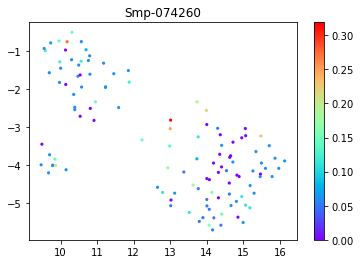

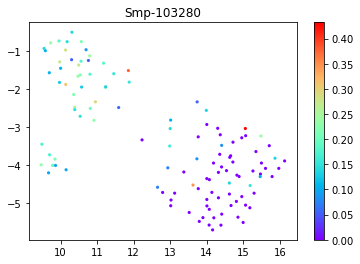

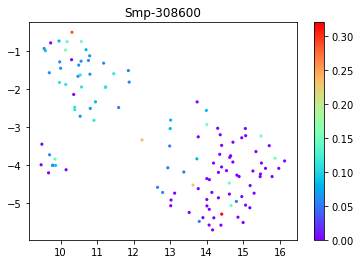

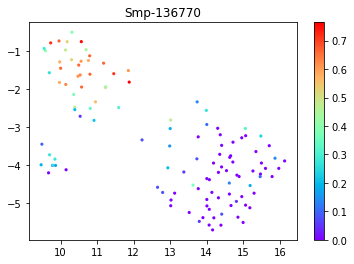

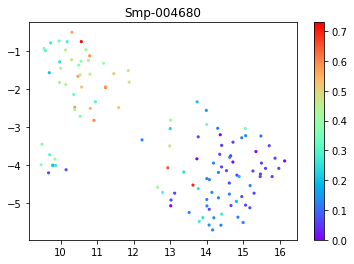

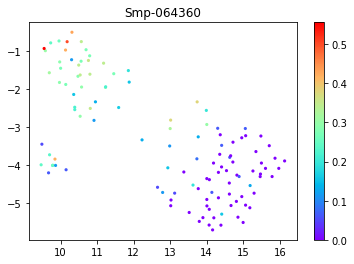

In [35]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [49]:
markers_clust3, marker_scores_clust3 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [3])

In [50]:
first_value = list(markers_clust3.values())[0]
first_value
first_value[:10]

array(['Smp-312630', 'Smp-042140', 'Smp-302860', 'Smp-146140',
       'Smp-079770', 'Smp-074140', 'Smp-129250', 'Smp-319650',
       'Smp-158590', 'Smp-037230'], dtype='<U12')

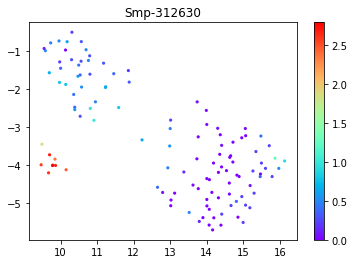

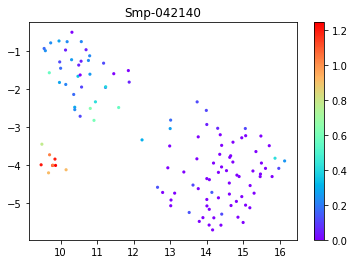

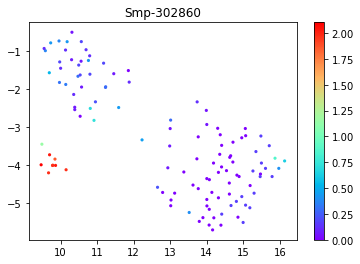

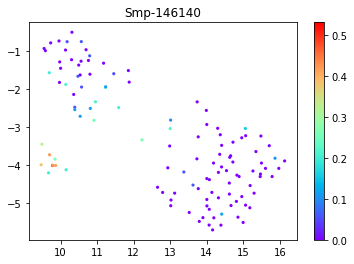

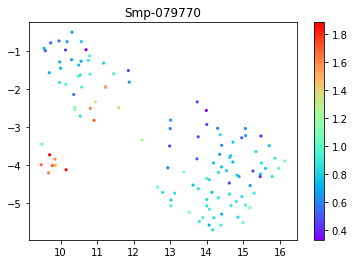

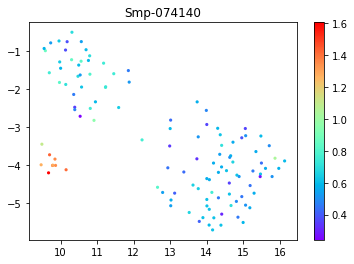

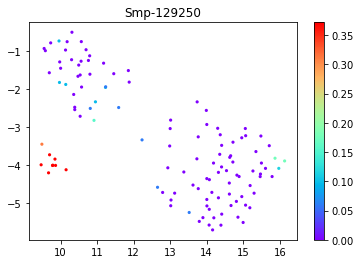

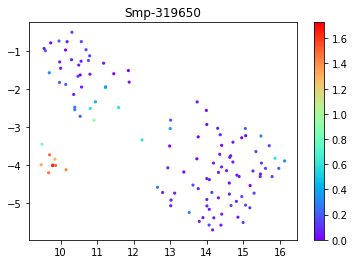

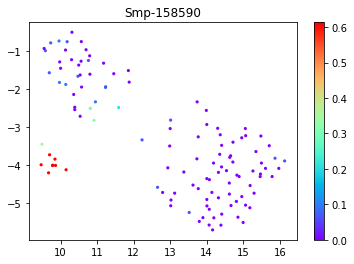

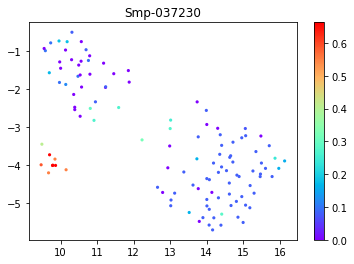

In [38]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [39]:
markers_clust4, marker_scores_clust4 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [4])

In [40]:
first_value = list(markers_clust4.values())[0]
first_value
first_value[:10]

array(['Smp-319650', 'Smp-334060', 'Smp-060090', 'Smp-171120',
       'Smp-079700', 'Smp-318500', 'Smp-125760', 'Smp-194930',
       'Smp-141650', 'Smp-346270'], dtype='<U12')

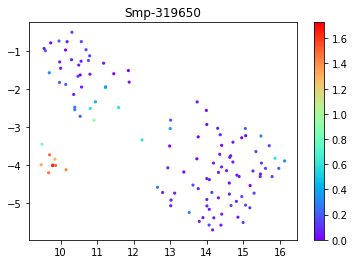

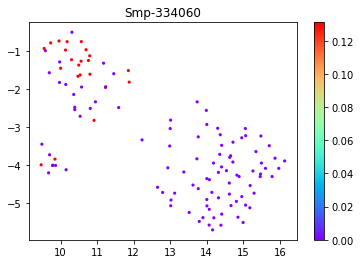

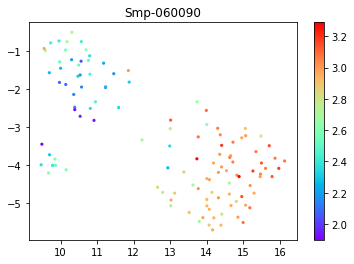

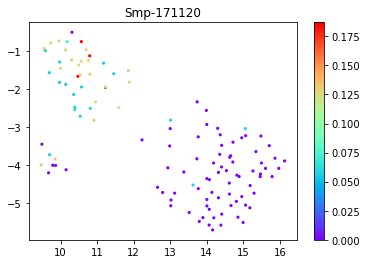

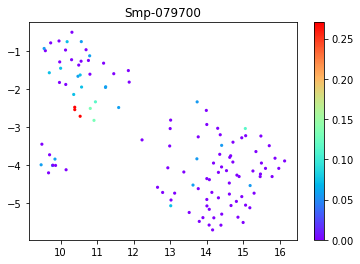

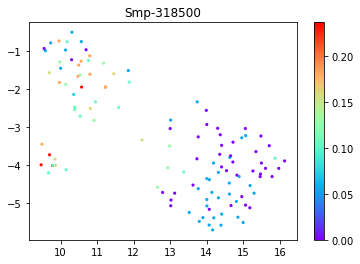

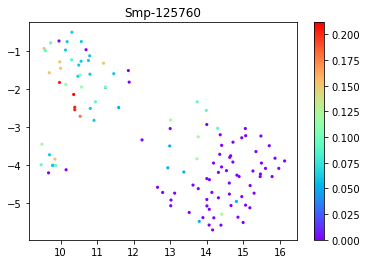

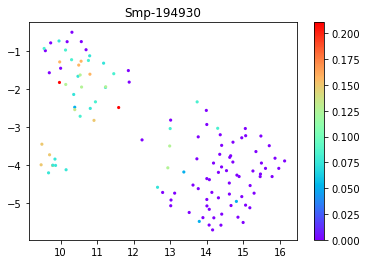

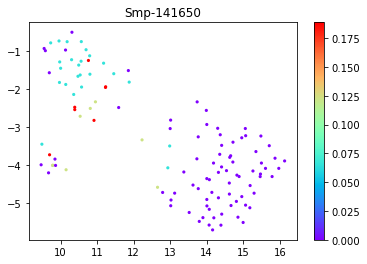

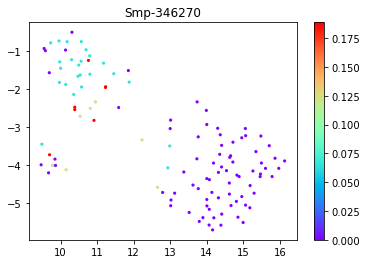

In [41]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [42]:
markers_clust5, marker_scores_clust5 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [5])

In [43]:
first_value = list(markers_clust5.values())[0]
first_value
first_value[:10]

array(['Smp-319650', 'Smp-334060', 'Smp-060090', 'Smp-171120',
       'Smp-079700', 'Smp-318500', 'Smp-125760', 'Smp-194930',
       'Smp-141650', 'Smp-346270'], dtype='<U12')

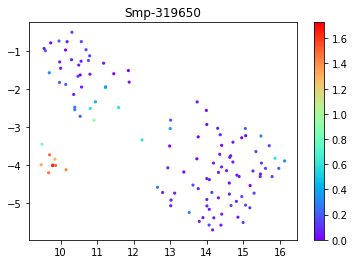

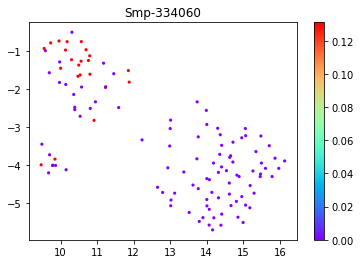

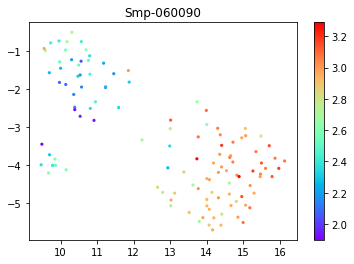

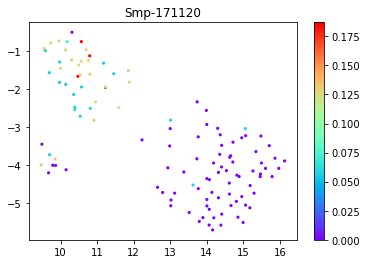

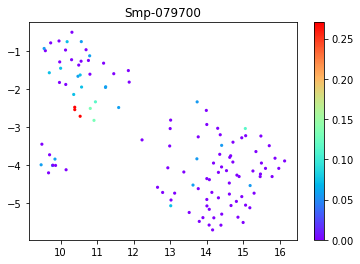

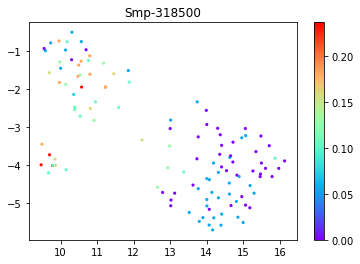

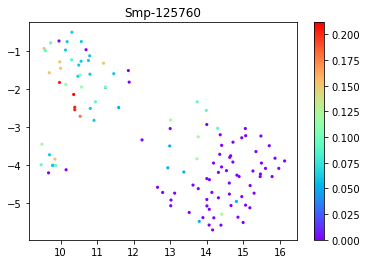

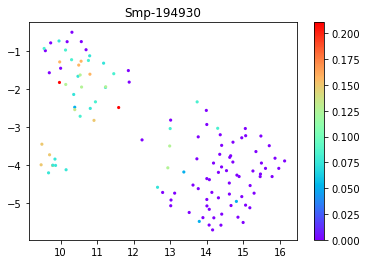

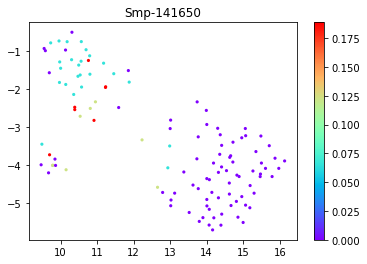

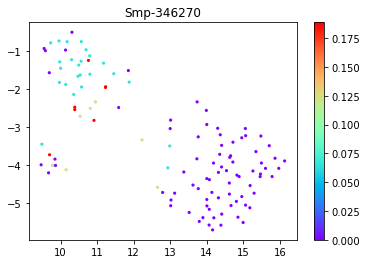

In [44]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

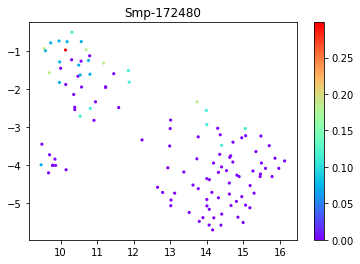

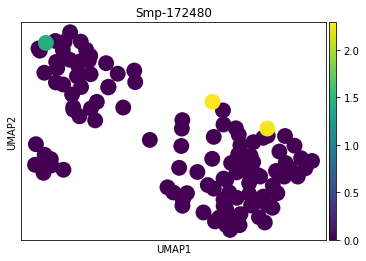

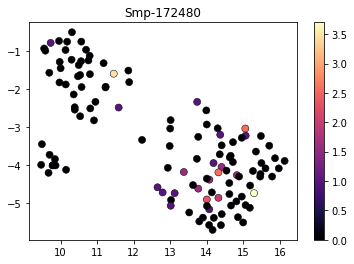

In [58]:
samsporo.show_gene_expression('Smp-172480');
sc.pl.umap(samsporoadata, color='Smp-172480', palette='Set2');
axes,values = samsporo.show_gene_expression('Smp-172480', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.kappa.klf.Smp-172480.pdf', dpi=500)

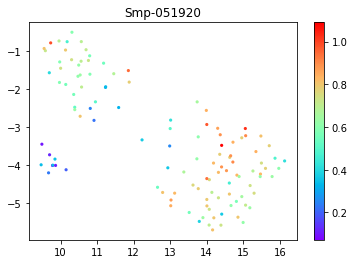

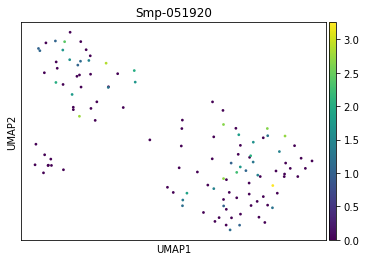

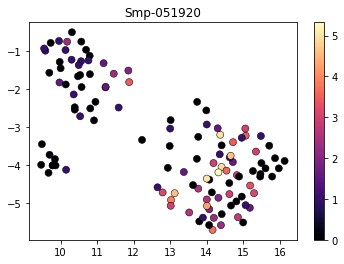

In [59]:
samsporo.show_gene_expression('Smp-051920');
sc.pl.umap(samsporoadata, color='Smp-051920', palette='blue', size=30);
axes,values = samsporo.show_gene_expression('Smp-051920', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.kappa.nanos2.Smp-051920.pdf', dpi=500)

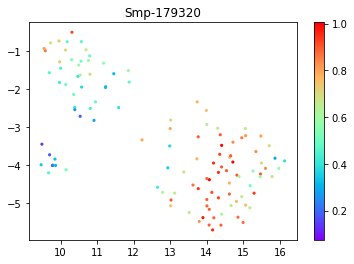

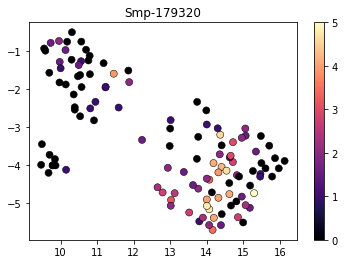

In [62]:
samsporo.show_gene_expression('Smp-179320');
axes,values = samsporo.show_gene_expression('Smp-179320', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.kappa.ago2-1.Smp-179320.pdf', dpi=500)

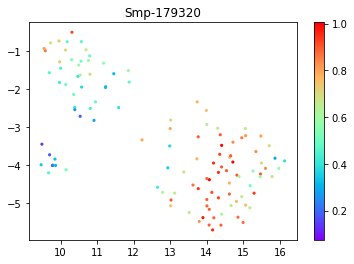

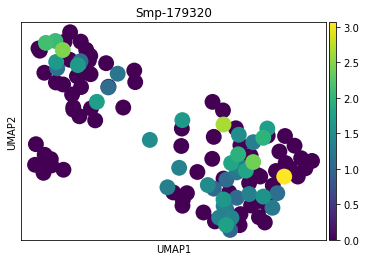

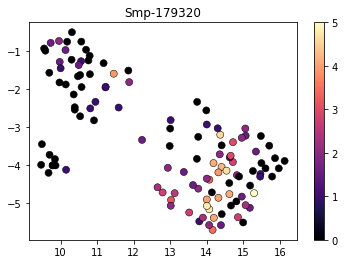

In [63]:
samsporo.show_gene_expression('Smp-179320');
sc.pl.umap(samsporoadata, color='Smp-179320', palette='Set2');
axes,values = samsporo.show_gene_expression('Smp-179320', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.ago2-1.Smp-179320.pdf', dpi=500)

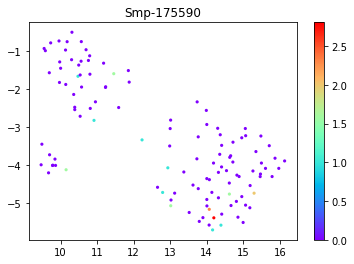

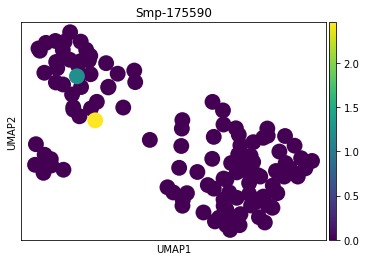

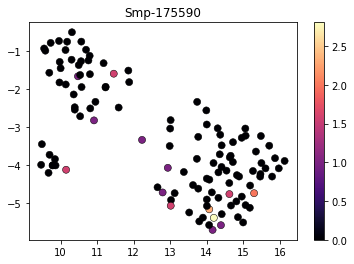

In [64]:
samsporo.show_gene_expression('Smp-175590',  avg=False);
sc.pl.umap(samsporoadata, color='Smp-175590', palette='Set2');
axes,values = samsporo.show_gene_expression('Smp-175590', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.fgfrA.Smp-175590.pdf', dpi=500)

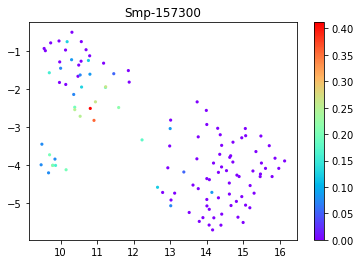

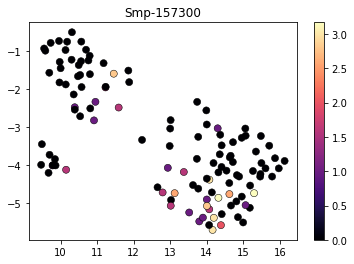

In [65]:
samsporo.show_gene_expression('Smp-157300');
axes,values = samsporo.show_gene_expression('Smp-157300', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.fgfrB.Smp-157300.pdf', dpi=500)

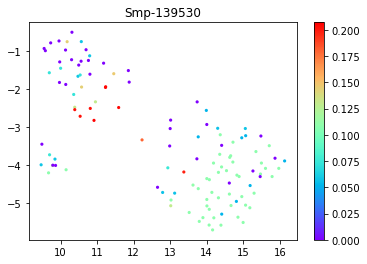

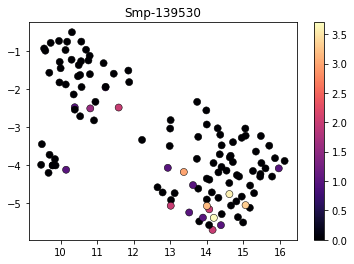

In [66]:
samsporo.show_gene_expression('Smp-139530');
axes,values = samsporo.show_gene_expression('Smp-139530', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.p53.Smp-139530.pdf', dpi=500)

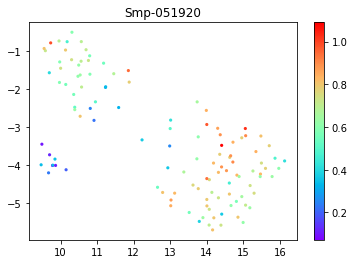

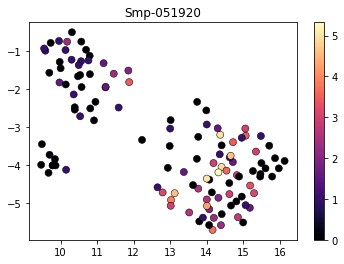

In [67]:
samsporo.show_gene_expression('Smp-051920');
axes,values = samsporo.show_gene_expression('Smp-051920', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.nanos2.Smp-051920.pdf', dpi=500)

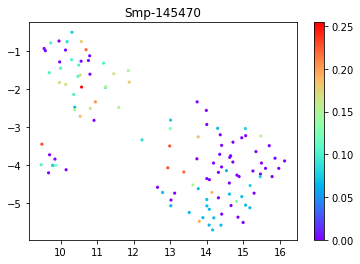

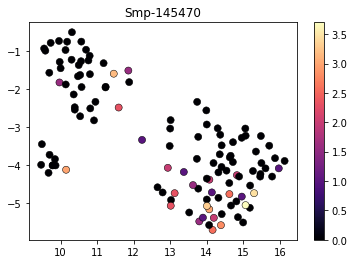

In [68]:
samsporo.show_gene_expression('Smp-145470');
axes,values = samsporo.show_gene_expression('Smp-145470', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.zfp1.Smp-145470.pdf', dpi=500)

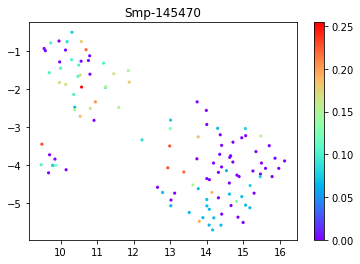

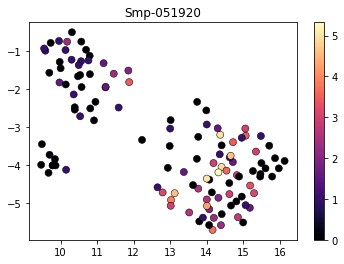

In [69]:
samsporo.show_gene_expression('Smp-145470');
axes,values = samsporo.show_gene_expression('Smp-051920', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.phi.zfp1.Smp-145470.pdf', dpi=500)

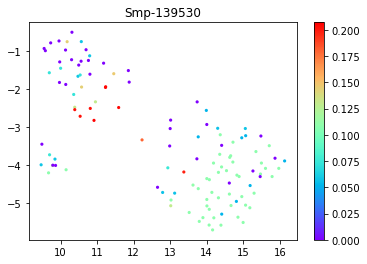

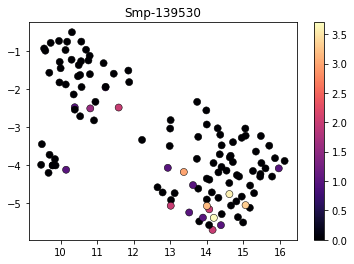

In [70]:
samsporo.show_gene_expression('Smp-139530');
axes,values = samsporo.show_gene_expression('Smp-139530', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.phi.p53.Smp-139530.pdf', dpi=500)

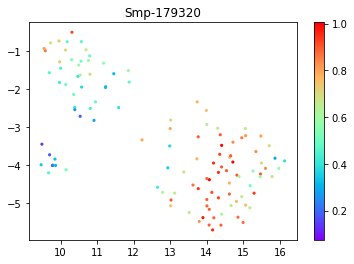

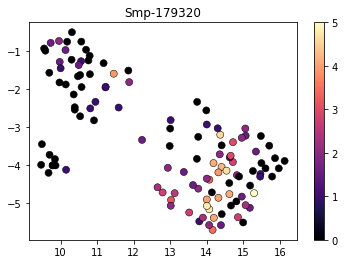

In [71]:
samsporo.show_gene_expression('Smp-179320');
axes,values = samsporo.show_gene_expression('Smp-179320', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.phi.ago2-1.Smp-179320.pdf', dpi=500)

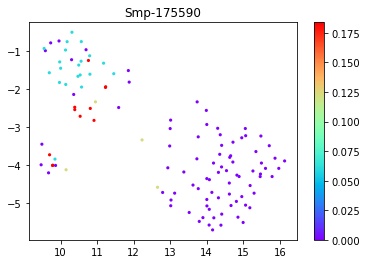

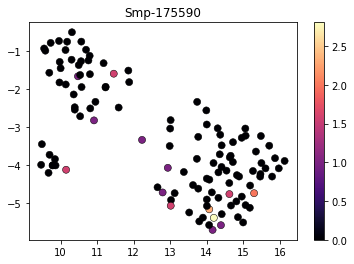

In [72]:
samsporo.show_gene_expression('Smp-175590');
axes,values = samsporo.show_gene_expression('Smp-175590', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.phi.fgfrA.Smp-175590.pdf', dpi=500)

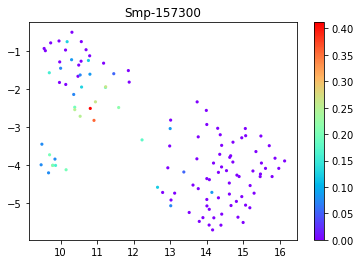

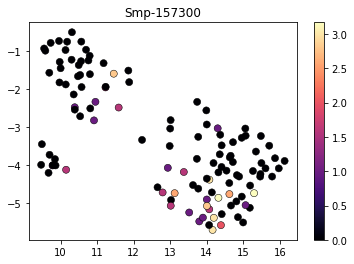

In [74]:
samsporo.show_gene_expression('Smp-157300');
axes,values = samsporo.show_gene_expression('Smp-157300', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.phi.fgfrB.Smp-157300.pdf', dpi=500)

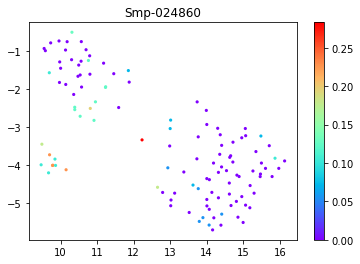

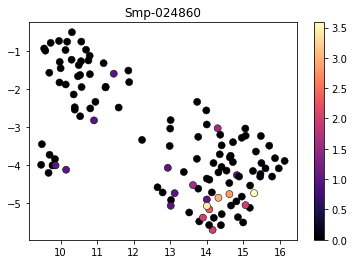

In [75]:
samsporo.show_gene_expression('Smp-024860');
axes,values = samsporo.show_gene_expression('Smp-024860', cmap = 'magma', projection = 'X_umap',linewidth=0.5,edgecolor='k',s=50,  avg=False);
plt.savefig('sporo_stem/coloursamsporo3.stem.seed20.delta.hesl.Smp-024860.pdf', dpi=500)

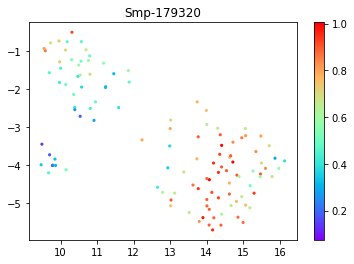

In [10]:
samsporo.show_gene_expression('Smp-179320');
plt.savefig('samsporo3.stem.seed20.ago2-1.Smp-179320.pdf', dpi=500)

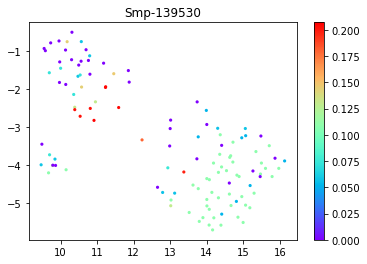

In [11]:
samsporo.show_gene_expression('Smp-139530');
plt.savefig('samsporo3.stem.seed20.p53.Smp-139530.pdf', dpi=500)

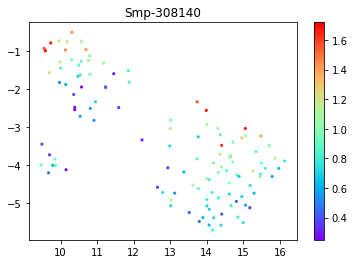

In [12]:
samsporo.show_gene_expression('Smp-308140');
plt.savefig('samsporo3.stem.seed20.uppa.Smp-308140.pdf', dpi=500)

In [10]:
m = pd.read_csv("/Users/ta13/R_tutorials/sporocysts/meta_sporos.csv")
samsporo.obs = m

In [18]:
m.

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,scrubScore,scrubCall,scrubSim1,scrubSim2,PASS_MT,...,prediction.score.Meg4..cells,prediction.score.Ambiguous.2,prediction.score.max,RNA_snn_res.0.4,RNA_snn_res.3,RNA_snn_res.0,RNA_snn_res.0.5,RNA_snn_res.1.5,RNA_snn_res.2,RNA_snn_res.2.5
0,FUGI_R_D7465034_AAACGGGTCTCTTGAT-1,SeuratProject,1211,633,0.000000,0.079545,False,0.166667,0.208791,True,...,0.000000,0.060975,0.839291,2,3,0,2,4,2,5
1,FUGI_R_D7465034_AAAGCAAAGAAACGAG-1,SeuratProject,1325,533,0.452830,0.067358,False,0.079545,0.094340,True,...,0.175824,0.014844,0.554539,1,0,0,1,0,3,1
2,FUGI_R_D7465034_AACACGTTCCGCGCAA-1,SeuratProject,29048,3453,0.578353,0.067358,False,0.166667,0.136000,True,...,0.000000,0.000000,1.000000,2,6,0,2,6,5,6
3,FUGI_R_D7465034_AACCGCGAGGCTATCT-1,SeuratProject,590,411,1.016949,0.112676,False,0.094340,0.079545,True,...,0.000000,0.000000,0.887286,3,7,0,4,2,0,7
4,FUGI_R_D7465034_AACCGCGTCCCTGACT-1,SeuratProject,500,328,0.200000,0.136000,False,0.208791,0.094340,True,...,0.000000,0.000000,0.889530,3,7,0,4,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,FUGI_R_D7465037_TTGGCAAAGGTGTTAA-1,SeuratProject,20064,3681,2.038477,0.136000,False,0.057143,0.094340,True,...,0.000000,0.000000,0.918674,0,4,0,5,1,8,4
597,FUGI_R_D7465037_TTTACTGTCTTGGGTA-1,SeuratProject,872,378,0.000000,0.112676,False,0.166667,0.270270,True,...,0.000000,0.162355,0.336304,2,11,0,2,4,2,10
598,FUGI_R_D7465037_TTTATGCCATGAAGTA-1,SeuratProject,29552,2772,0.548186,0.136000,False,0.112676,0.094340,True,...,0.000000,0.000000,1.000000,2,6,0,2,6,5,6
599,FUGI_R_D7465037_TTTGGTTGTGAAAGAG-1,SeuratProject,5384,881,0.000000,0.112676,False,0.550000,0.079545,True,...,0.000000,0.071981,0.543326,2,3,0,2,4,2,5


In [63]:
sc.pl.rank_genes_groups_stacked_violin(samsporoadata, n_genes=3, cmap='viridis_r')

KeyError: 'rank_genes_groups'

In [23]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(samsporoadata, key_added='leiden_clusters', resolution=0.5)

KeyError: 'No "neighbors" in .uns'

In [25]:
samsporoadata.obs['leiden_clusters']

FUGI_R_D7465034_AAACGGGTCTCTTGAT-1    1
FUGI_R_D7465034_AACACGTTCCGCGCAA-1    0
FUGI_R_D7465034_AAGTCTGCATAGTAAG-1    1
FUGI_R_D7465034_ACATACGGTTGTACAC-1    0
FUGI_R_D7465034_ACATGGTCATGGAATA-1    0
                                     ..
FUGI_R_D7465037_TTCGGTCTCAACACTG-1    0
FUGI_R_D7465037_TTCTCCTTCCTTGGTC-1    1
FUGI_R_D7465037_TTTACTGTCTTGGGTA-1    0
FUGI_R_D7465037_TTTATGCCATGAAGTA-1    0
FUGI_R_D7465037_TTTGGTTGTGAAAGAG-1    0
Name: leiden_clusters, Length: 119, dtype: category
Categories (4, int64): [0, 1, 2, 3]

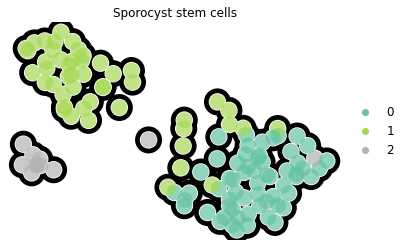

In [29]:
sc.pl.umap(samsporoadata, color='leiden_clusters', add_outline=True, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='Sporocyst stem cells', palette='Set2', save='sporo3_stem.seed20.leiden_clusters.pdf')

In [17]:
samsporoadata = samsporo.adata

In [12]:
samsporoadata

AnnData object with n_obs × n_vars = 119 × 9842
    obs: 'leiden_clusters'
    var: 'mask_genes', 'means', 'variances', 'weights', 'spatial_dispersions'
    uns: 'path_to_file', 'preprocess_args', 'run_args', 'ranked_genes'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_disp', 'X_knn_avg'
    obsp: 'distances', 'connectivities', 'nnm'

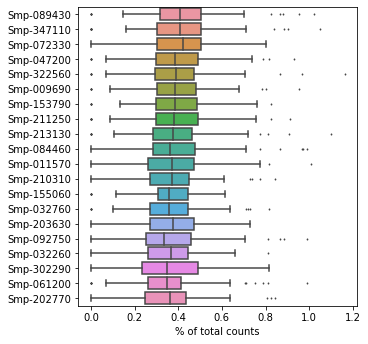

In [13]:
sc.pl.highest_expr_genes(samsporoadata, n_top=20, )

In [14]:
sc.pp.calculate_qc_metrics(samsporoadata, percent_top=None, log1p=False, inplace=True)

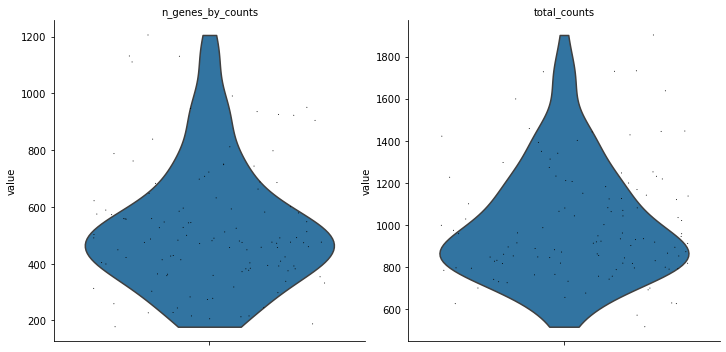

In [15]:
sc.pl.violin(samsporoadata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

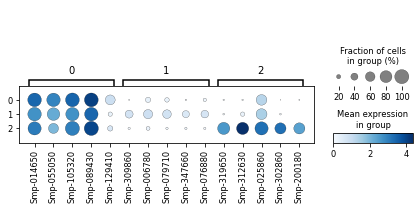

In [31]:
sc.pl.dotplot(samsporoadata, top_genes_dict,'leiden_clusters', cmap='Blues', dendrogram=False, save='sporo_stem.seed20.leiden_clusters.pdf')

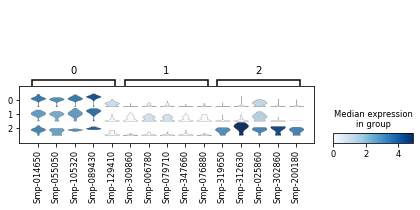

In [30]:
sc.pl.stacked_violin(samsporoadata, top_genes_dict, groupby='leiden_clusters', swap_axes=False, dendrogram=False, save='sporo_stem.seed20.leiden_clusters.pdf')

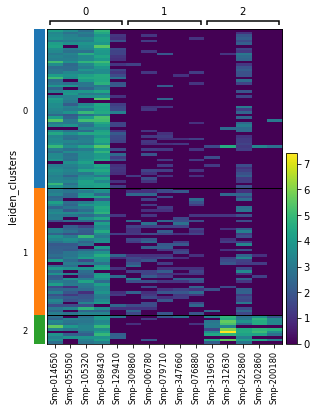

In [29]:
sc.pl.heatmap(samsporoadata, top_genes_dict, groupby='leiden_clusters', cmap='viridis', dendrogram=False, save='sporo_stem.seed20.leiden_clusters.pdf')

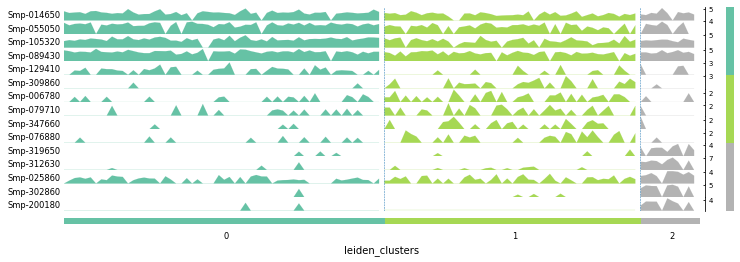

In [43]:
sc.pl.tracksplot(samsporoadata, top_genes_dict, groupby='leiden_clusters', dendrogram=False, save='sporo_stem.seed20.leiden_clusters.pdf')

In [24]:
sc.tl.rank_genes_groups(samsporoadata, groupby='leiden_clusters', method='wilcoxon')

In [25]:
pd.DataFrame(samsporoadata.uns['rank_genes_groups']['names']).head(5)

,0,1,2
0,Smp-014650,Smp-309860,Smp-319650
1,Smp-055050,Smp-006780,Smp-312630
2,Smp-105320,Smp-079710,Smp-025860
3,Smp-089430,Smp-347660,Smp-302860
4,Smp-129410,Smp-076880,Smp-200180


In [26]:
top_genes_dict = {
    '0': ['Smp-014650', 'Smp-055050', 'Smp-105320', 'Smp-089430', 'Smp-129410'],
    '1': ['Smp-309860', 'Smp-006780', 'Smp-079710', 'Smp-347660', 'Smp-076880'],
    '2': ['Smp-319650', 'Smp-312630', 'Smp-025860', 'Smp-302860', 'Smp-200180'],
}

In [27]:
top_genes_dict

{'0': ['Smp-014650', 'Smp-055050', 'Smp-105320', 'Smp-089430', 'Smp-129410'],
 '1': ['Smp-309860', 'Smp-006780', 'Smp-079710', 'Smp-347660', 'Smp-076880'],
 '2': ['Smp-319650', 'Smp-312630', 'Smp-025860', 'Smp-302860', 'Smp-200180']}

In [28]:
fd = pd.DataFrame(samsporoadata.uns['rank_genes_groups']['names'])

In [34]:
fd

,0,1,2
0,Smp-014650,Smp-309860,Smp-319650
1,Smp-055050,Smp-006780,Smp-312630
2,Smp-105320,Smp-079710,Smp-025860
3,Smp-089430,Smp-347660,Smp-302860
4,Smp-129410,Smp-076880,Smp-200180
...,...,...,...
9837,Smp-010290,Smp-011570,Smp-036270
9838,Smp-078090,Smp-055050,Smp-010940
9839,Smp-076230,Smp-089430,Smp-179650
9840,Smp-069760,Smp-014650,Smp-086860


In [114]:
fd.to_csv('sporo_stemcellclusts_SAMgenes.csv', index=False, header=True)

In [8]:
fdSAM = pd.DataFrame(samsporo.adata.uns['ranked_genes'])

In [9]:
fdSAM

,0
0,Smp-319650
1,Smp-201060
2,Smp-006390
3,Smp-033050
4,Smp-302860
...,...
9837,Smp-165320
9838,Smp-148720
9839,Smp-187800
9840,Smp-042020


In [63]:
fdSAM.to_csv('sporo_stemcell_allSAMgenes.csv', index=False, header=False)

In [75]:
SAM_genes_list = ['Smp-014650', 'Smp-055050', 'Smp-105320', 'Smp-089430', 'Smp-129410']

SAM_genes_list = samsporo.adata.uns['ranked_genes'][:40]

In [76]:
print(samsporo.adata.uns['ranked_genes'][:40])

['Smp-319650' 'Smp-201060' 'Smp-006390' 'Smp-033050' 'Smp-302860'
 'Smp-312630' 'Smp-200180' 'Smp-341080' 'Smp-101970' 'Smp-042140'
 'Smp-309860' 'Smp-175660' 'Smp-025560' 'Smp-008660' 'Smp-032240'
 'Smp-170570' 'Smp-146800' 'Smp-091480' 'Smp-105680' 'Smp-072970'
 'Smp-332400' 'Smp-201220' 'Smp-036220' 'Smp-002230' 'Smp-141140'
 'Smp-300380' 'Smp-093690' 'Smp-130680' 'sma.nc.W.S24' 'Smp-246300'
 'Smp-075870' 'Smp-069760' 'Smp-180170' 'Smp-010290' 'Smp-165870'
 'Smp-021130' 'Smp-008770' 'Smp-044000' 'Smp-337570' 'Smp-046680']


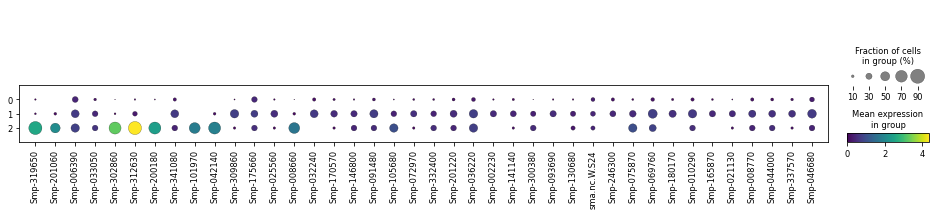

In [77]:
sc.pl.dotplot(samsporoadata, SAM_genes_list, groupby='leiden_clusters', cmap='viridis', dendrogram=False)

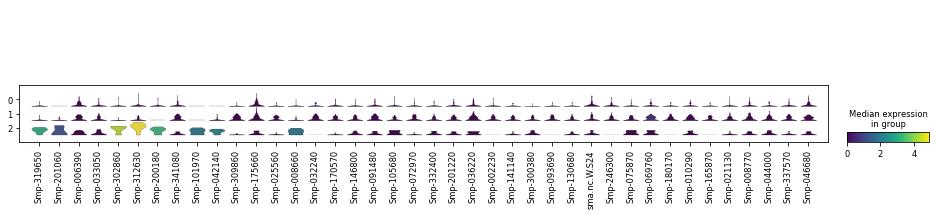

In [78]:
sc.pl.stacked_violin(samsporoadata, SAM_genes_list, groupby='leiden_clusters', cmap='viridis', dendrogram=False)

In [109]:
test_genes_list = ['Smp-348800','Smp-082240','Smp-020920','Smp-336770','Smp-348790','Smp-019690']

In [110]:
test_genes_list

['Smp-348800',
 'Smp-082240',
 'Smp-020920',
 'Smp-336770',
 'Smp-348790',
 'Smp-019690']

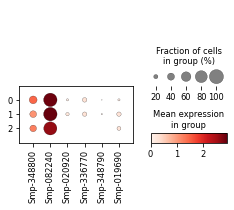

In [111]:
sc.pl.dotplot(samsporoadata, test_genes_list,'leiden_clusters', dendrogram=False)

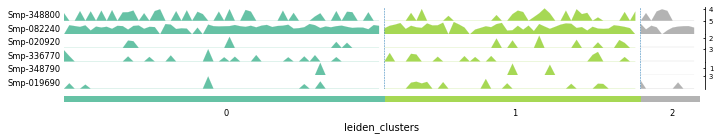

In [112]:
sc.pl.tracksplot(samsporoadata, test_genes_list,'leiden_clusters', dendrogram=False)

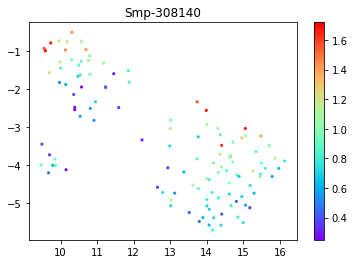

In [118]:
samsporo.show_gene_expression('Smp-308140');

In [120]:
test_genes_list = ['Smp-139530','Smp-308140', 'Smp-179320']

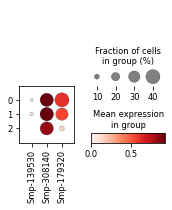

In [121]:
sc.pl.dotplot(samsporoadata, test_genes_list,'leiden_clusters', dendrogram=False)

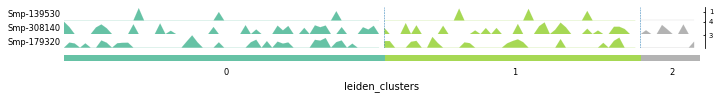

In [122]:
sc.pl.tracksplot(samsporoadata, test_genes_list,'leiden_clusters', dendrogram=False)

In [127]:
test_genes_list = ['Smp-139530','Smp-308140', 'Smp-179320', 'Smp-085540', 'Smp-051920', 'Smp-024860']

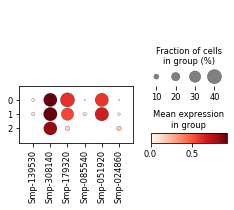

In [128]:
sc.pl.dotplot(samsporoadata, test_genes_list,'leiden_clusters', dendrogram=False)

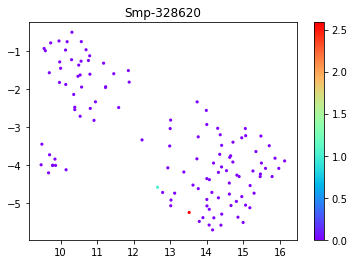

In [23]:
samsporo.show_gene_expression('Smp-328620');

Check the expression of Zhigang's heatmap genes in the sporo stem cells

In [58]:
heatmap_genes_list = ['Smp-186930','Smp-027990','Smp-331700','Smp-158750','Smp-033950','Smp-124010','Smp-163140','Smp-138140','Smp-347890','Smp-147640','Smp-134690','Smp-308310']

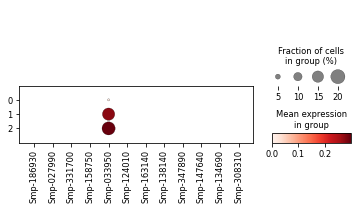

In [59]:
sc.pl.dotplot(samsporoadata, heatmap_genes_list, groupby='leiden_clusters', swap_axes=False, dendrogram=False, save='sporo_stem.seed20.ZL_heatmap.pdf')

In [80]:
our_genes_list = ['Smp-046500','Smp-086860','Smp-245030','Smp-074390','Smp-097380','Smp-210630','Smp-063250','Smp-113620','Smp-341240','Smp-179650','Smp-046090']

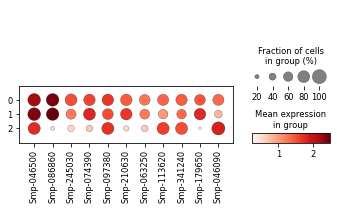

In [81]:
sc.pl.dotplot(samsporoadata, our_genes_list, groupby='leiden_clusters', swap_axes=False, dendrogram=False, save='sporo_stem.seed20.ourTopStemGenes.pdf')